# A bit about programming in python

Very good online free resources on python: 
* http://interactivepython.org/courselib/static/thinkcspy/index.html
* http://www.diveintopython3.net/index.html
* https://www.python-course.eu/python3_course.php
* https://www.python.org/about/gettingstarted/
* https://wiki.python.org/moin/BeginnersGuide/Programmers


In [7]:
# https://stackoverflow.com/questions/28828917/error-importing-seaborn-module-in-python

# Visualizing statistical relationship

In [5]:
# in case seaborn/anaconda makes issue for the import or find the seaborn
# conda install -c https://conda.anaconda.org/anaconda seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [6]:
url_data = "https://raw.githubusercontent.com/sb0709/bootcamp_KSU/master/Data/data_reg.csv"
df = pd.read_csv(url_data,sep=',' ) # for specify the index we use here the colums "0" when reading the data: , index_col=0

### Relating variables with scatter plots

* https://seaborn.pydata.org/tutorial/relational.html


``` The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.
```

```
There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the scatterplot() function. In the categorical visualization tutorial, we will see specialized tools for using scatterplots to visualize categorical data. The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):```

In [3]:
list(df.columns)

['MATCHKEY',
 'RBAL',
 'TRADES',
 'AGE',
 'AGE_groups',
 'DELQID',
 'CRELIM',
 'goodbad',
 'BRNEW',
 'BRAGE']

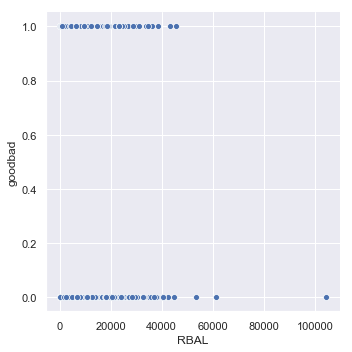

In [4]:
sns.relplot(x="RBAL", y="goodbad", data=df);

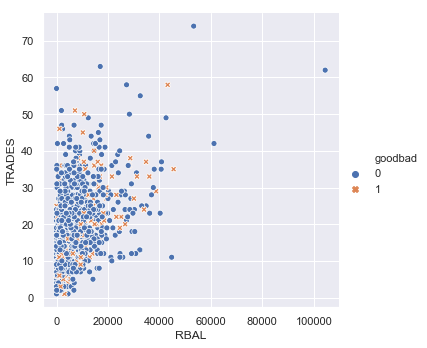

In [12]:
sns.relplot(x="RBAL", y="TRADES", hue="goodbad", style="goodbad", data=df);

# Plotting with categorical data

Categorical scatterplots:

* stripplot() (with kind="strip"; the default)
* swarmplot() (with kind="swarm")

Categorical distribution plots:

* boxplot() (with kind="box")
* violinplot() (with kind="violin")
* boxenplot() (with kind="boxen")

Categorical estimate plots:

* pointplot() (with kind="point")
* barplot() (with kind="bar")
* countplot() (with kind="count")

https://seaborn.pydata.org/tutorial/categorical.html

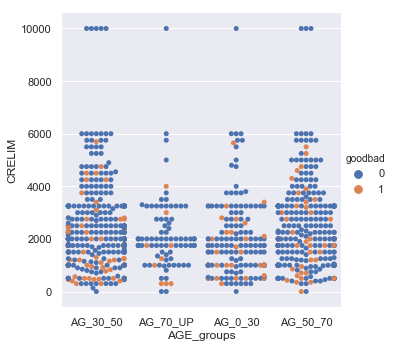

In [21]:
sns.catplot(x="AGE_groups", y="CRELIM",hue="goodbad", kind="swarm" , data=df); # kind="swarm"  parameter

# Distributions of observations within categories


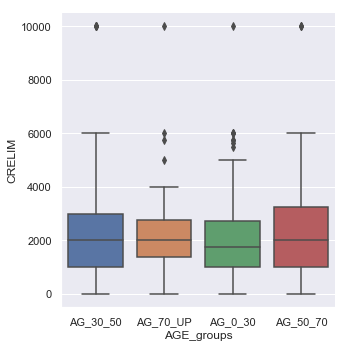

In [24]:
sns.catplot(x="AGE_groups", y="CRELIM", kind="box", data=df);


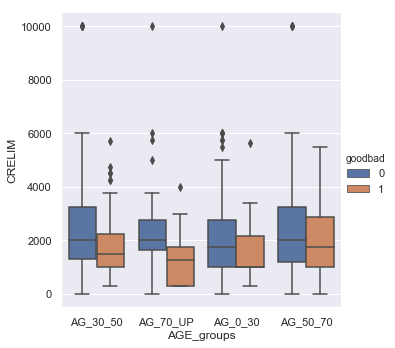

In [25]:
sns.catplot(x="AGE_groups", y="CRELIM", kind="box",hue="goodbad", data=df);


# Statistical estimation within categories

/Users/sb0709/anaconda3/envs/bootcamp_ksu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


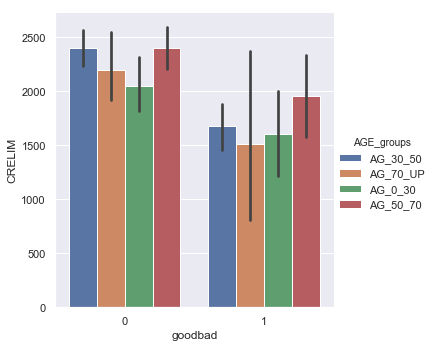

In [29]:
sns.catplot(x="goodbad", y="CRELIM", kind="bar", hue="AGE_groups", data=df);

In [32]:
# Showing multiple relationships with facets

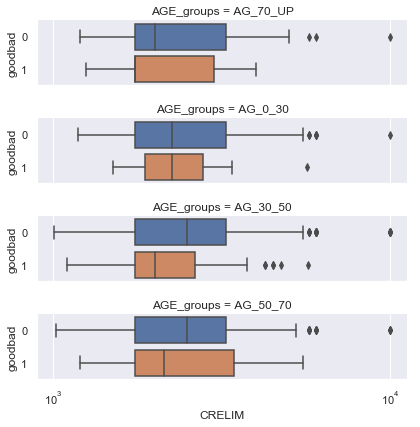

In [31]:
g = sns.catplot(x="CRELIM", y="goodbad", row="AGE_groups",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df.query("CRELIM > 1000"))
g.set(xscale="log");

# Showing distributions of the variables model:

/Users/sb0709/anaconda3/envs/bootcamp_ksu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


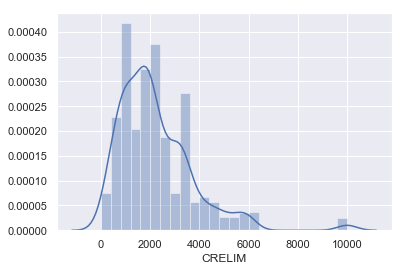

In [33]:
sns.distplot(df['CRELIM']);

# Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

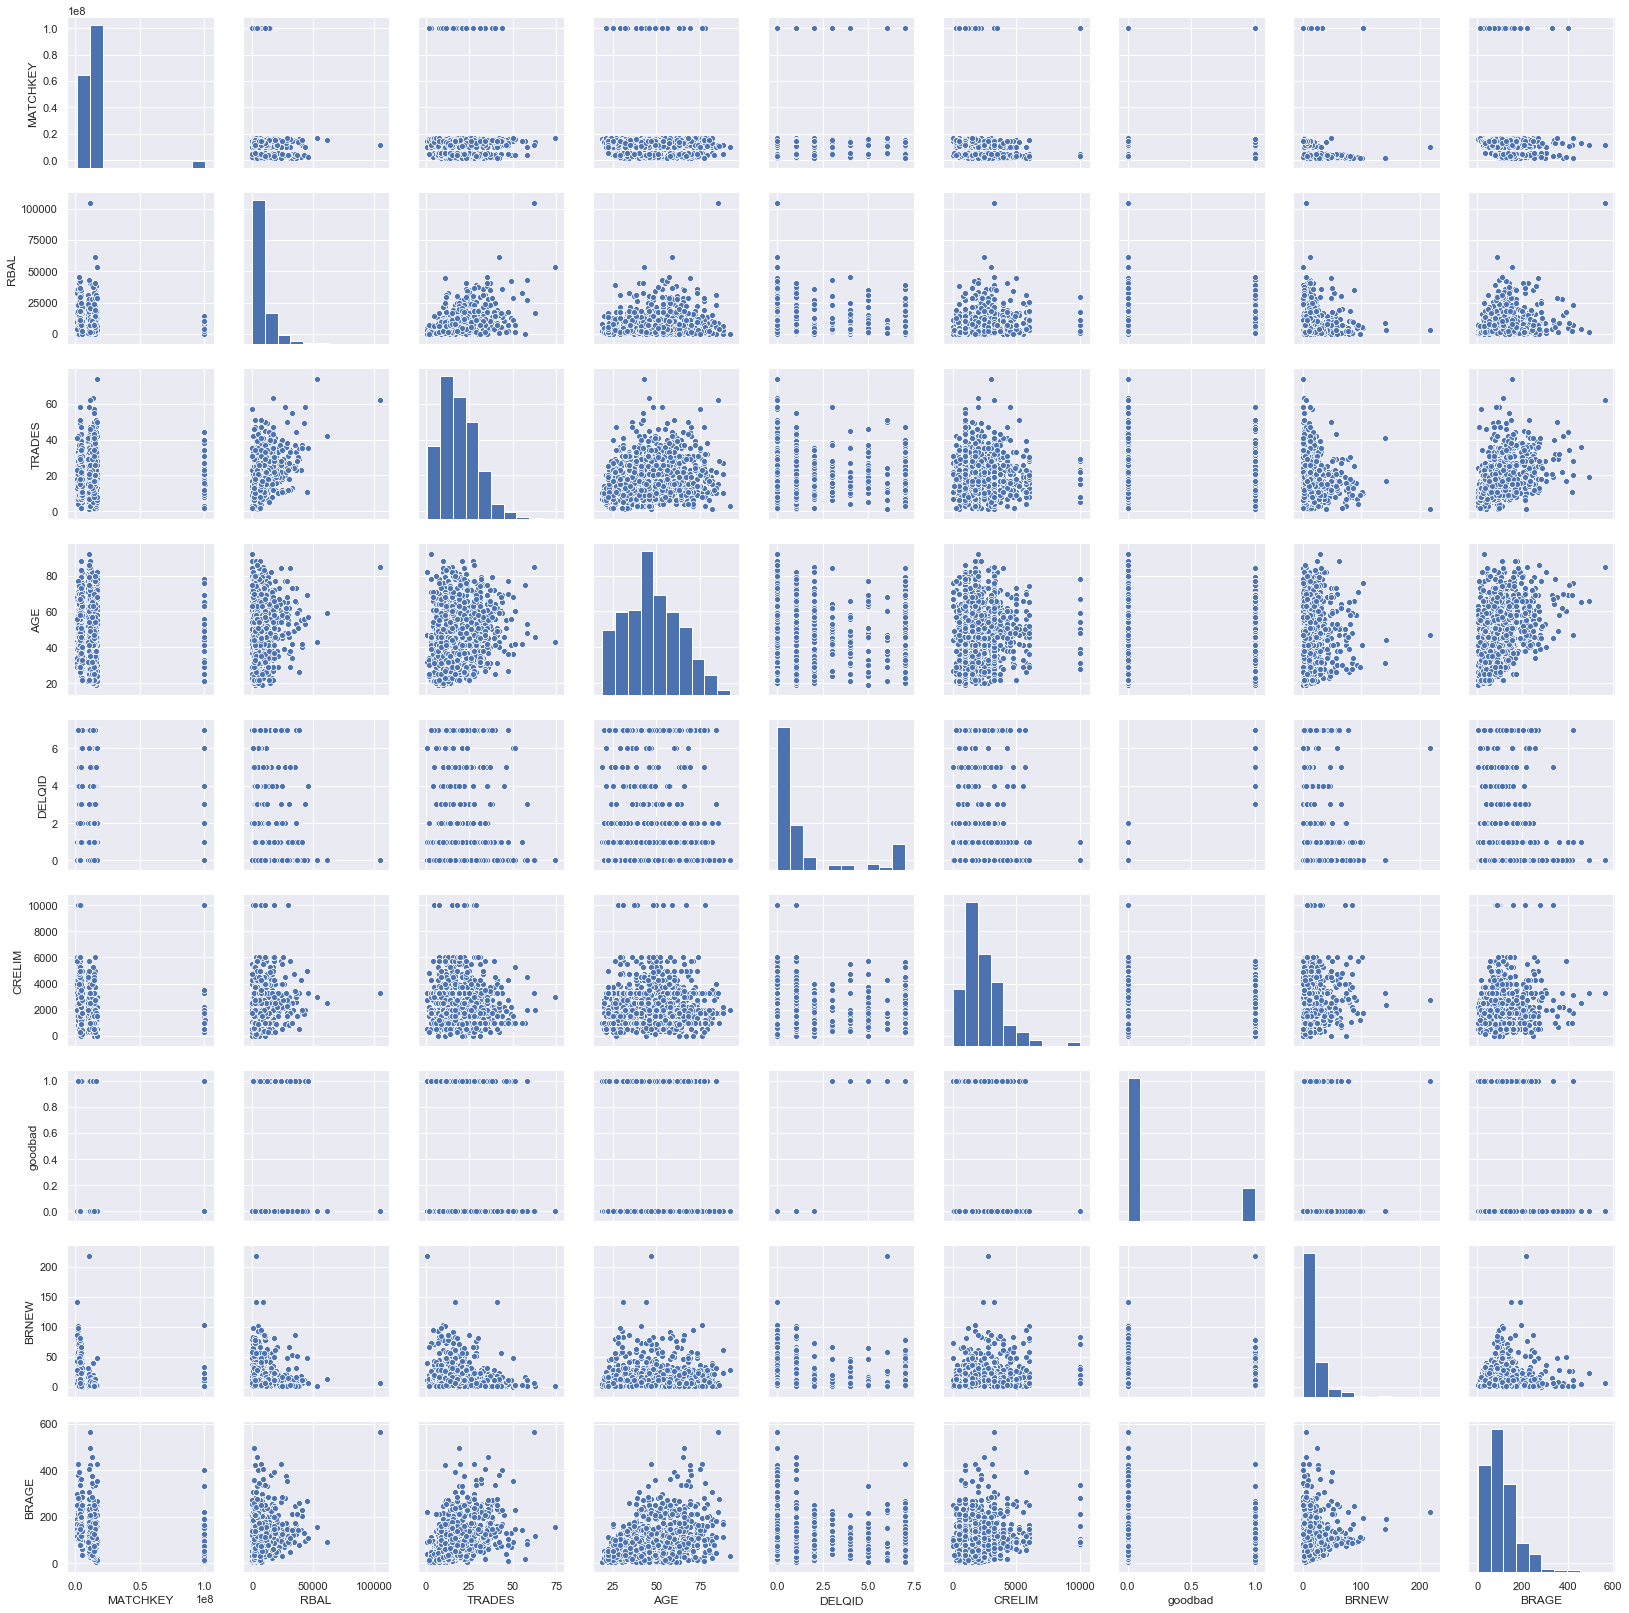

In [34]:
sns.pairplot(df);

# Functions to draw linear regression models

Source doc: https://seaborn.pydata.org/tutorial/regression.html

/Users/sb0709/anaconda3/envs/bootcamp_ksu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


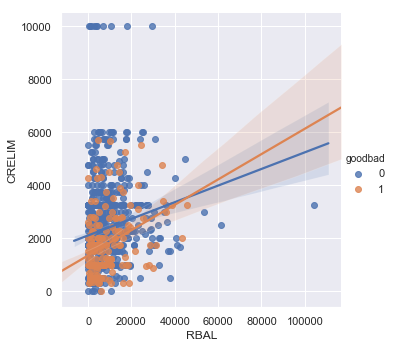

In [38]:
sns.lmplot(x="RBAL", y="CRELIM", hue="goodbad", data=df);


In [45]:
"""
'RBAL',
 'TRADES',
 'AGE',
 'AGE_groups',
 'DELQID',
 'CRELIM',
 'goodbad',
 'BRNEW',
 'BRAGE'
 
"""

df_mlt = pd.DataFrame([[2, 4, 7, 8, 1, 3, 2017], [9, 2, 4, 5, 5, 6, 2018]], columns=['Amy', 'Bob', 'Carl', 'Chris', 'Ben', 'Other', 'Year'])




In [46]:
df_mlt

,Amy,Bob,Carl,Chris,Ben,Other,Year
0,2,4,7,8,1,3,2017
1,9,2,4,5,5,6,2018


In [49]:
df_melted = pd.melt(df_mlt, id_vars='Year', 
                    value_vars=['Amy', 'Bob', 'Carl', 'Chris', 'Ben', 'Other'], # columns to become the row
                    var_name=['Students']) #naming of the variable create for our variables 

In [50]:
df_melted

,Year,Students,value
0,2017,Amy,2
1,2018,Amy,9
2,2017,Bob,4
3,2018,Bob,2
4,2017,Carl,7
5,2018,Carl,4
6,2017,Chris,8
7,2018,Chris,5
8,2017,Ben,1
9,2018,Ben,5


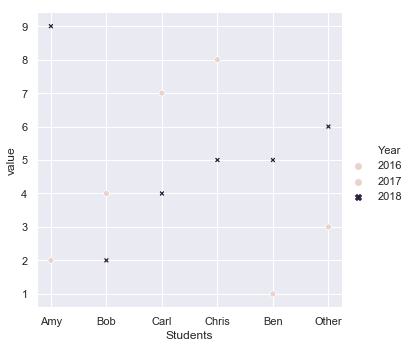

In [52]:
sns.relplot(x="Students", y="value", hue="Year", style="Year", data=df_melted);